In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings

In [2]:
%run parse_data.ipynb

(297, 10)
    ca  thal
0  0.0   6.0
1  3.0   3.0
2  2.0   7.0
3  0.0   3.0
4  0.0   3.0
Datset after deleting rows where ca (number of major blood vessels coloured by fluorscopy) and type of 'thal' (thalessaemia) is unknown      sex   age  trestbps   chol  fbs  restecg  thalach  exang   ca  thal
0    1.0  63.0     145.0  233.0  1.0      2.0    150.0    0.0  0.0   6.0
1    1.0  67.0     160.0  286.0  0.0      2.0    108.0    1.0  3.0   3.0
2    1.0  67.0     120.0  229.0  0.0      2.0    129.0    1.0  2.0   7.0
3    1.0  37.0     130.0  250.0  0.0      0.0    187.0    0.0  0.0   3.0
4    0.0  41.0     130.0  204.0  0.0      2.0    172.0    0.0  0.0   3.0
..   ...   ...       ...    ...  ...      ...      ...    ...  ...   ...
297  0.0  57.0     140.0  241.0  0.0      0.0    123.0    1.0  0.0   7.0
298  1.0  45.0     110.0  264.0  0.0      0.0    132.0    0.0  0.0   7.0
299  1.0  68.0     144.0  193.0  1.0      0.0    141.0    0.0  2.0   7.0
300  1.0  57.0     130.0  131.0  0.0      0.0 

In [3]:
df.describe()

,sex,age,blood pressure,cholesterol,Fasting Blood Sugar,restecg,thalach,exercise induced angina,severity of artery blockage,blood defect type
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.676768,54.542088,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,-0.676768,4.730640
std,0.468500,9.049736,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,0.938965,1.938629
min,0.000000,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-3.000000,3.000000
25%,0.000000,48.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,-1.000000,3.000000
50%,1.000000,56.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.000000,3.000000
75%,1.000000,61.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,0.000000,7.000000
max,1.000000,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,-0.000000,7.000000


In [4]:
import pandas as pd

df["binary_target"] = (df["severity of artery blockage"] < 0).astype(int)

print(df[["severity of artery blockage", "binary_target"]].head())
print(df["binary_target"].value_counts())


   severity of artery blockage  binary_target
0                         -0.0              0
1                         -3.0              1
2                         -2.0              1
3                         -0.0              0
4                         -0.0              0
binary_target
0    174
1    123
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


x = df.drop(columns=['age group', 'severity of artery blockage', 'binary_target']) 
labels = df["binary_target"]             

print(x.shape, labels.shape)

(297, 9) (297,)


In [6]:
print(df.dtypes)

sex                             float64
age                             float64
blood pressure                  float64
cholesterol                     float64
Fasting Blood Sugar             float64
restecg                         float64
thalach                         float64
exercise induced angina         float64
severity of artery blockage     float64
blood defect type               float64
age group                      category
binary_target                     int64
dtype: object


In [7]:
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(x, labels)

print( knc )

KNeighborsClassifier(n_neighbors=2)


In [8]:
x_new = [1, 56, 180, 400, 1, 2, 197, 1, 3]
label_new = knc.predict( [ x_new ] )
warnings.filterwarnings('ignore')

print( label_new )

[0]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    x, labels, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5666666666666667
              precision    recall  f1-score   support

           0       0.58      0.94      0.72        35
           1       0.33      0.04      0.07        25

    accuracy                           0.57        60
   macro avg       0.46      0.49      0.39        60
weighted avg       0.48      0.57      0.45        60



In [10]:
df["binary_target2"] = (df["severity of artery blockage"] < -1).astype(int)

print(df[["severity of artery blockage", "binary_target2"]].head())
print(df["binary_target2"].value_counts())

x2 = df.drop(columns=['age group', 'severity of artery blockage', 'binary_target2', 'binary_target']) 
labels2 = df["binary_target2"]             

print(x2.shape, labels.shape)

knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(x2, labels2)

print( knc )

x_new = [1, 56, 180, 400, 1, 2, 197, 1, 3]
label_new = knc.predict( [ x_new ] )

print( label_new )

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    x2, labels2, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train2, y_train2)

y_pred2 = knn.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))
warnings.filterwarnings('ignore')

   severity of artery blockage  binary_target2
0                         -0.0               0
1                         -3.0               1
2                         -2.0               1
3                         -0.0               0
4                         -0.0               0
binary_target2
0    239
1     58
Name: count, dtype: int64
(297, 9) (297,)
KNeighborsClassifier(n_neighbors=2)
[0]
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        49
           1       1.00      0.09      0.17        11

    accuracy                           0.83        60
   macro avg       0.92      0.55      0.54        60
weighted avg       0.86      0.83      0.77        60



In [11]:
df["binary_target3"] = (df["severity of artery blockage"] < -2).astype(int)

print(df[["severity of artery blockage", "binary_target3"]].head())
print(df["binary_target3"].value_counts())

x3 = df.drop(columns=['age group', 'severity of artery blockage', 'binary_target3', 'binary_target2', 'binary_target']) 
labels3 = df["binary_target3"]             

print(x3.shape, labels.shape)

knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(x3, labels3)

print( knc )

x_new = [1, 56, 180, 400, 1, 2, 197, 1, 3]
label_new = knc.predict( [ x_new ] )

print( label_new )

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    x3, labels3, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train3, y_train3)

y_pred3 = knn.predict(X_test3)
print("Accuracy:", accuracy_score(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))
warnings.filterwarnings('ignore')

   severity of artery blockage  binary_target3
0                         -0.0               0
1                         -3.0               1
2                         -2.0               0
3                         -0.0               0
4                         -0.0               0
binary_target3
0    277
1     20
Name: count, dtype: int64
(297, 9) (297,)
KNeighborsClassifier(n_neighbors=2)
[0]
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.00      0.00      0.00         3

    accuracy                           0.95        60
   macro avg       0.47      0.50      0.49        60
weighted avg       0.90      0.95      0.93        60



In [12]:
KNNtable0 = pd.DataFrame({
   'Binary Grouping': [
        '0 = CAD; -1, -2, -3 = no CAD',
        '0, -1 = CAD; -2, -3 = no CAD',
        '0, -1, -2 = CAD; -3 = no CAD'
    ],
    'Accuracy Score': [0.57, 0.83, 0.95]
})

print(KNNtable0)

def KNNtable(df, figure_label="Table 1."):

    table_df = pd.DataFrame({
        "Binary Grouping": [
        '0 = CAD; -1, -2, -3 = no CAD',
        '0, -1 = CAD; -2, -3 = no CAD',
        '0, -1, -2 = CAD; -3 = no CAD'
    ],
        "Accuracy": [round(accuracy_score(y_test, y_pred), 2), round(accuracy_score(y_test2, y_pred2), 2), round(accuracy_score(y_test3, y_pred3), 2)],
       
    })

    fig, ax = plt.subplots(figsize=(9, 2))
    ax.axis('off') 

    tbl = ax.table(
        cellText=table_df.values,
        colLabels=table_df.columns,
        cellLoc='center',
        loc='center',
        edges='closed' 
    )

    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1, 1.5)  

    fig.suptitle(figure_label, x=0.01, y=0.99, ha='left', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return fig

print(KNNtable)

                Binary Grouping  Accuracy Score
0  0 = CAD; -1, -2, -3 = no CAD            0.57
1  0, -1 = CAD; -2, -3 = no CAD            0.83
2  0, -1, -2 = CAD; -3 = no CAD            0.95
<function KNNtable at 0x1347caac0>


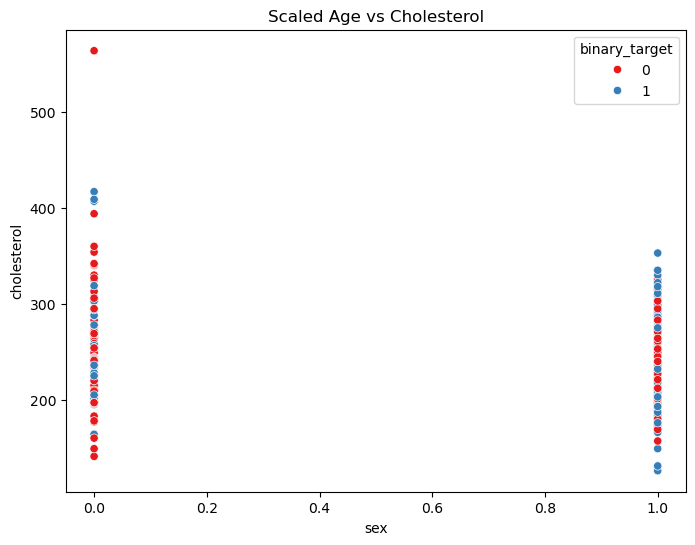

In [13]:
X = df.drop(columns=["severity of artery blockage", "age group"])
y = df["binary_target"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="sex",
    y="cholesterol",
    hue='binary_target',
    data=X,
    palette="Set1"
)
plt.title("Scaled Age vs Cholesterol")
plt.show()


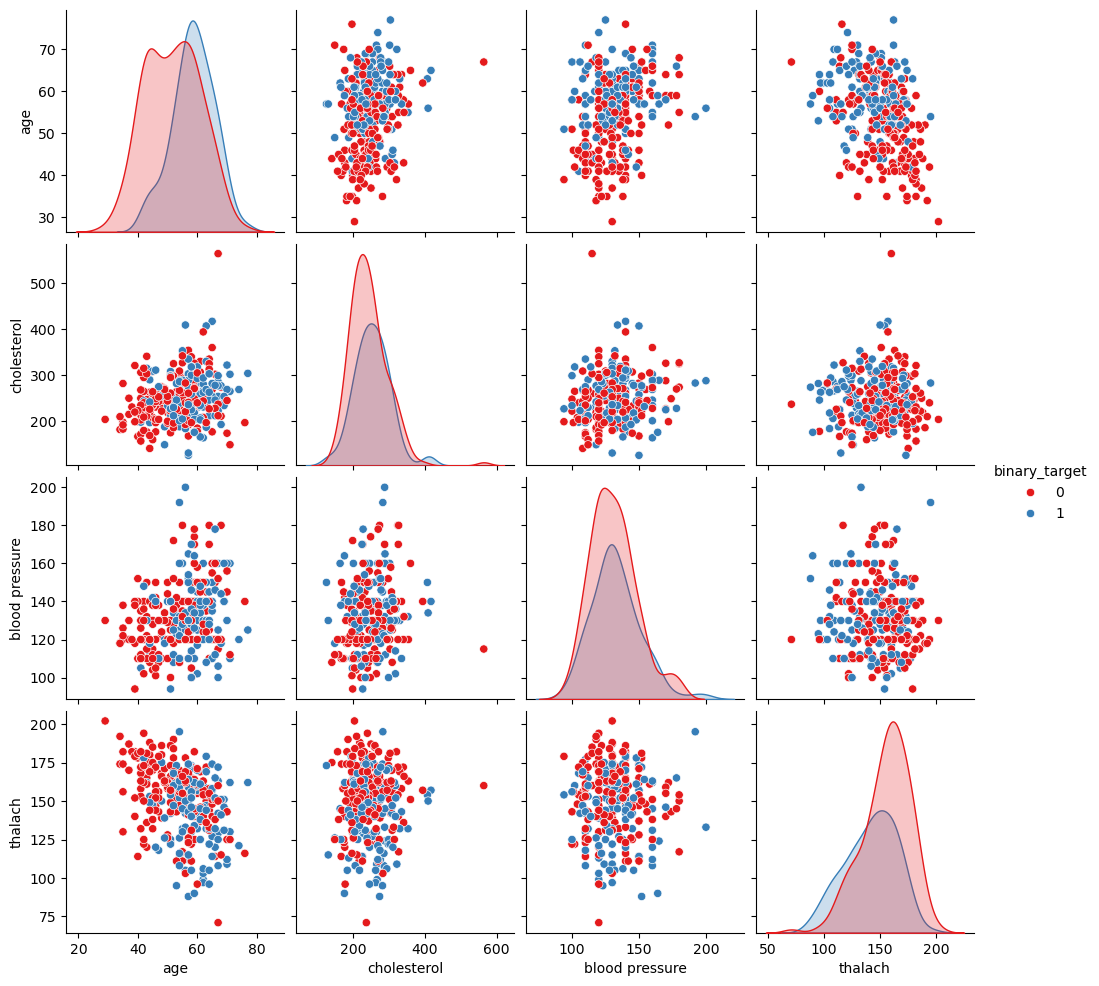

In [14]:
features = [
    "age",
    "cholesterol",
    "blood pressure",
    "thalach",
    "binary_target" 
]

sns.pairplot(
    df[features],
    hue="binary_target",
    diag_kind="kde",
    palette="Set1"
)

plt.show()


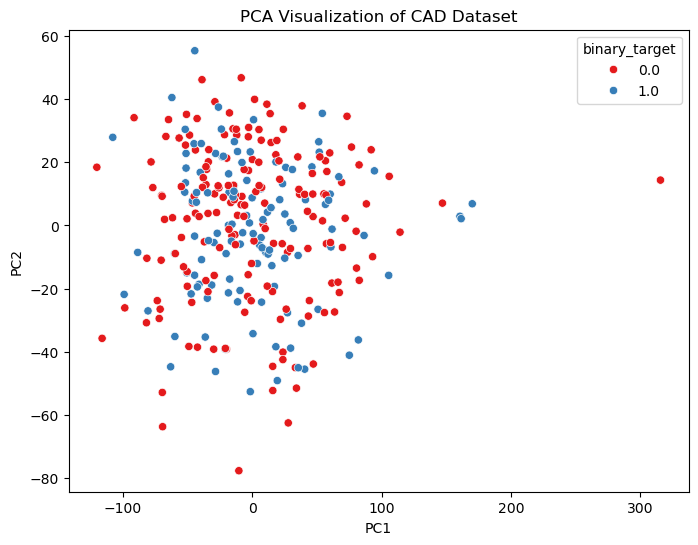

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop target columns
X = df.drop(columns=["severity of artery blockage", "binary_target"])

# One-hot encode categorical features
X = pd.get_dummies(X)

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["binary_target"] = df["binary_target"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="binary_target",
    data=pca_df,
    palette="Set1"
)

plt.title("PCA Visualization of CAD Dataset")
plt.show()


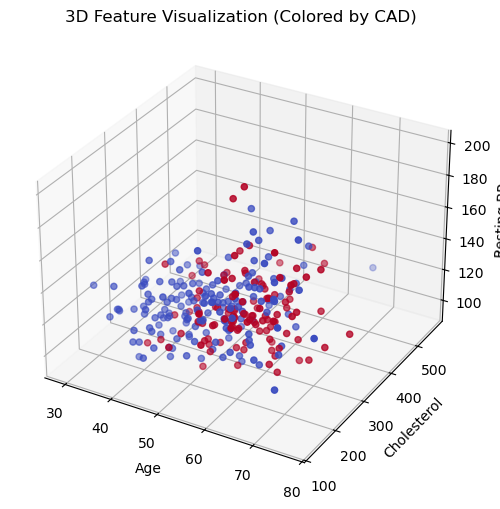

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    df["age"],
    df["cholesterol"],
    df["blood pressure"],
    c=df["binary_target"],
    cmap="coolwarm"
)

ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("Resting BP")
plt.title("3D Feature Visualization (Colored by CAD)")
plt.show()


In [17]:

from matplotlib.colors import ListedColormap

def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.legend()


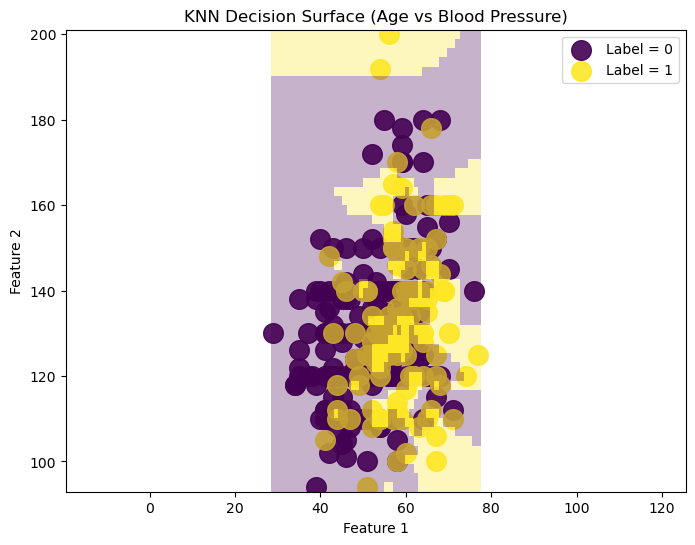

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x_2d = X[["age", "blood pressure"]].values

knc_2d = KNeighborsClassifier(n_neighbors=2)
knc_2d.fit(x_2d, labels)

plt.figure(figsize=(8, 6))
plot_decision_surface(knc_2d, x_2d, labels)
plt.title("KNN Decision Surface (Age vs Blood Pressure)")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.5666666666666667


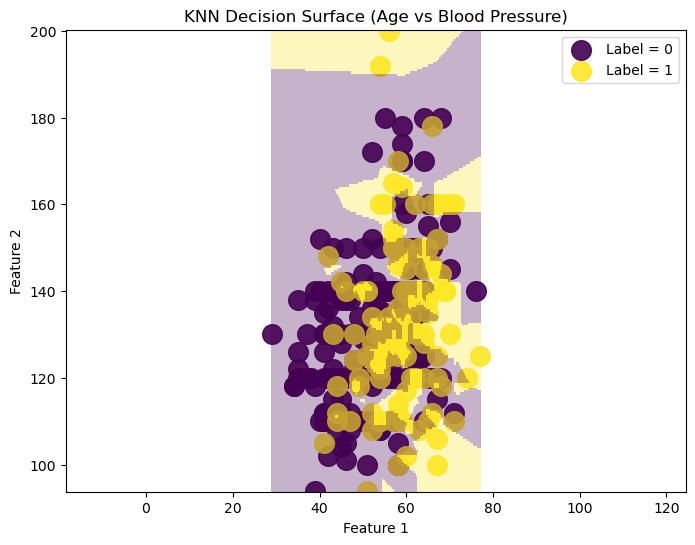

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x_2d = X[["age", "blood pressure"]].values

knc_2d = KNeighborsClassifier(n_neighbors=2)
knc_2d.fit(x_2d, labels)

plt.figure(figsize=(8, 6))
plot_decision_surface(knc_2d, x_2d, labels, n=200)
plt.title("KNN Decision Surface (Age vs Blood Pressure)")
plt.show()

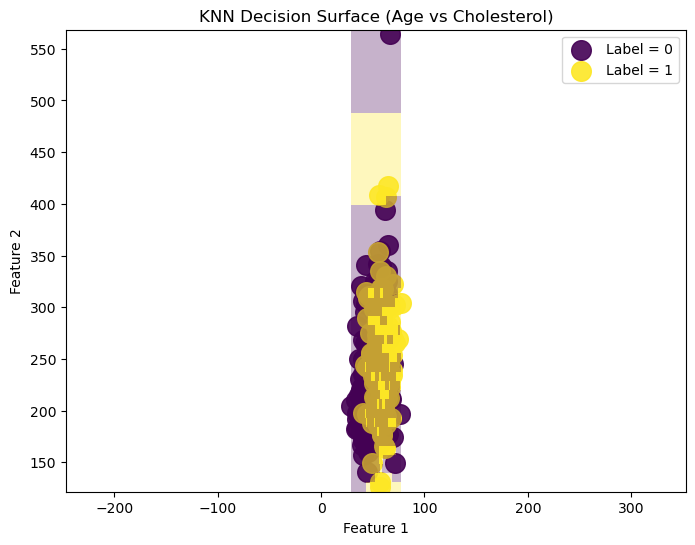

In [21]:
from sklearn.decomposition import PCA

x_2d = X[["age", "cholesterol"]].values

knc_2d = KNeighborsClassifier(n_neighbors=2)
knc_2d.fit(x_2d, labels)

plt.figure(figsize=(8, 6))
plot_decision_surface(knc_2d, x_2d, labels)
plt.title("KNN Decision Surface (Age vs Cholesterol)")
plt.show()

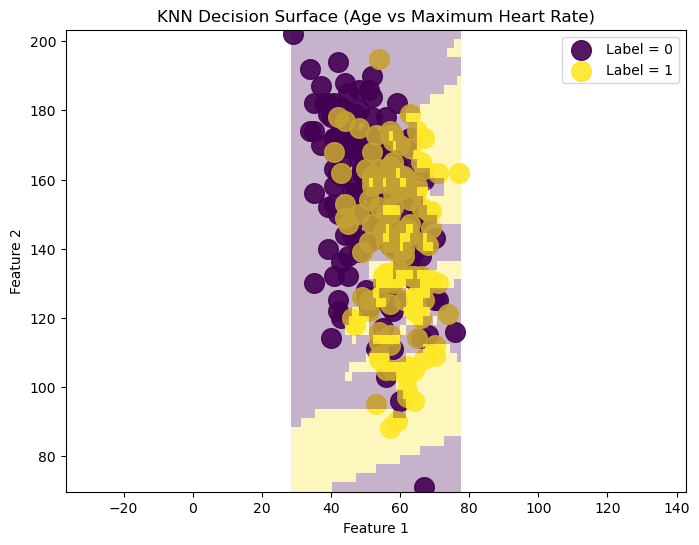

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x_2d = X[["age", "thalach"]].values

knc_2d = KNeighborsClassifier(n_neighbors=2)
knc_2d.fit(x_2d, labels)

plt.figure(figsize=(8, 6))
plot_decision_surface(knc_2d, x_2d, labels)
plt.title("KNN Decision Surface (Age vs Maximum Heart Rate)")
plt.show()

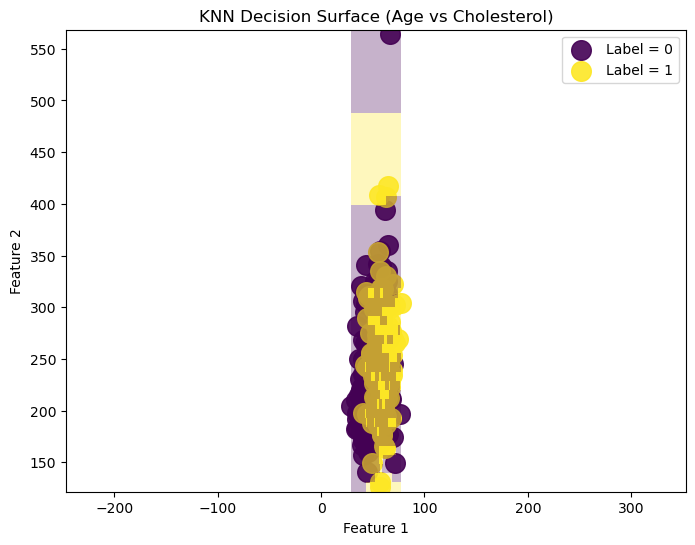

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x_2d = X[["age", "cholesterol"]].values

knc_2d = KNeighborsClassifier(n_neighbors=2)
knc_2d.fit(x_2d, labels)

plt.figure(figsize=(8, 6))
plot_decision_surface(knc_2d, x_2d, labels)
plt.title("KNN Decision Surface (Age vs Cholesterol)")
plt.show()

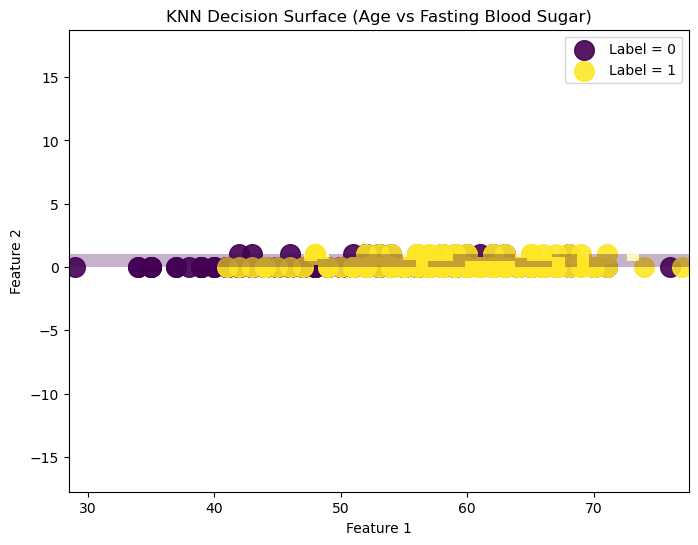

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x_2d = X[["age", "Fasting Blood Sugar"]].values

knc_2d = KNeighborsClassifier(n_neighbors=2)
knc_2d.fit(x_2d, labels)

plt.figure(figsize=(8, 6))
plot_decision_surface(knc_2d, x_2d, labels)
plt.title("KNN Decision Surface (Age vs Fasting Blood Sugar)")
plt.show()

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp    = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x, labels)

print(mlp)

MLPClassifier(alpha=0.5, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


In [26]:
import warnings
warnings.filterwarnings('ignore')
predictions   = mlp.predict( [ x_new ]  )

print(predictions)

[0]


In [27]:
labels_pred = mlp.predict(x)                       # predicted labels
cr          = accuracy_score(labels, labels_pred)  # classification rate

print( f'Classification rate = {cr}' )

Classification rate = 0.5993265993265994


In [28]:
mlp    = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x, labels)

print(mlp)

labels_pred = mlp.predict(x)                       # predicted labels
cr          = accuracy_score(labels, labels_pred)  # classification rate

print( f'Classification rate = {cr}' )

MLPClassifier(alpha=0.01, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')
Classification rate = 0.5993265993265994


In [29]:
mlp    = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(7, 3), random_state=1)
mlp.fit(x, labels)

print(mlp)

labels_pred = mlp.predict(x)                       # predicted labels
cr          = accuracy_score(labels, labels_pred)  # classification rate

print( f'Classification rate = {cr}' )

MLPClassifier(alpha=0.1, hidden_layer_sizes=(7, 3), random_state=1,
              solver='lbfgs')
Classification rate = 0.7171717171717171


In [30]:
x_train, x_test, labels_train, labels_test = train_test_split(x, labels, test_size=0.33, random_state=1)

print( f'Training data shape:    {x_train.shape}'  )
print( f'Test data shape:        {x_test.shape}'  )
print( f'Training labels shape:  {labels_train.shape}'  )
print( f'Test labels shape:      {labels_test.shape}'  )

Training data shape:    (198, 9)
Test data shape:        (99, 9)
Training labels shape:  (198,)
Test labels shape:      (99,)


In [31]:
labels_pred_train = mlp.predict(x_train)
labels_pred_test  = mlp.predict(x_test)
cr_train          = accuracy_score(labels_train, labels_pred_train)
cr_test           = accuracy_score(labels_test, labels_pred_test)
print( f'Classification rate (training) = {cr_train}' )
print( f'Classification rate (test)     = {cr_test}' )

Classification rate (training) = 0.7121212121212122
Classification rate (test)     = 0.7272727272727273


In [32]:
import warnings
warnings.filterwarnings('ignore')   # this will suppress warning from sklearn

ALPHA   = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 5]
niter   = 5   # number of iterations for each ALPHA value

np.random.seed(0)

CR      = []
for alpha in ALPHA:
    cr  = []
    for i in range(niter):
        x_train, x_test, labels_train, labels_test = train_test_split(x, labels, test_size=0.33)
        mlp    = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(50, 20), max_iter=1000)
        mlp.fit(x_train, labels_train)
        labels_pred_test  = mlp.predict(x_test)
        cr_test           = accuracy_score(labels_test, labels_pred_test)
        cr.append( cr_test )
    CR.append( cr )

CR      = np.array(CR)

In [33]:
def CRgraph(df, figure_label='Graph 1.'):
    plt.figure()
    ax = plt.axes()
    h0 = ax.plot(ALPHA, CR, 'k.', ms=3)[0]
    h1 = ax.plot(ALPHA, CR.mean(axis=1), 'k-', lw=3, label='Average CR')[0]
    ax.legend([h0,h1], ['Single classifier', 'Average performance'])
    ax.set_xlabel('alpha', size=16)
    ax.set_ylabel('CR', size=16)
    plt.show()

    return fig


In [34]:
mlp    = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(7, 3), random_state=1)
mlp.fit(x, labels)

print(mlp)

labels_pred = mlp.predict(x)                       # predicted labels
cr          = accuracy_score(labels, labels_pred)  # classification rate

print( f'Classification rate = {cr}' )

MLPClassifier(alpha=2, hidden_layer_sizes=(7, 3), random_state=1,
              solver='lbfgs')
Classification rate = 0.7407407407407407


In [35]:
x_train, x_test, labels_train, labels_test = train_test_split(x, labels, test_size=0.33, random_state=1)

print( f'Training data shape:    {x_train.shape}'  )
print( f'Test data shape:        {x_test.shape}'  )
print( f'Training labels shape:  {labels_train.shape}'  )
print( f'Test labels shape:      {labels_test.shape}'  )

Training data shape:    (198, 9)
Test data shape:        (99, 9)
Training labels shape:  (198,)
Test labels shape:      (99,)


In [36]:
labels_pred_train = mlp.predict(x_train)
labels_pred_test  = mlp.predict(x_test)
cr_train          = accuracy_score(labels_train, labels_pred_train)
cr_test           = accuracy_score(labels_test, labels_pred_test)
print( f'Classification rate (training) = {cr_train}' )
print( f'Classification rate (test)     = {cr_test}' )

Classification rate (training) = 0.7575757575757576
Classification rate (test)     = 0.7070707070707071


def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.legend()
    

# create and train a classifier
mlp    = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(7, 3), random_state=1)
mlp.fit(x_train, labels_train)

# plot the decision surface:
plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x_train, labels_train, colors=['b','r'])
plt.plot(x_test[:,0], x_test[:,1], 'ko', label='Test set')
plt.legend()
plt.show()

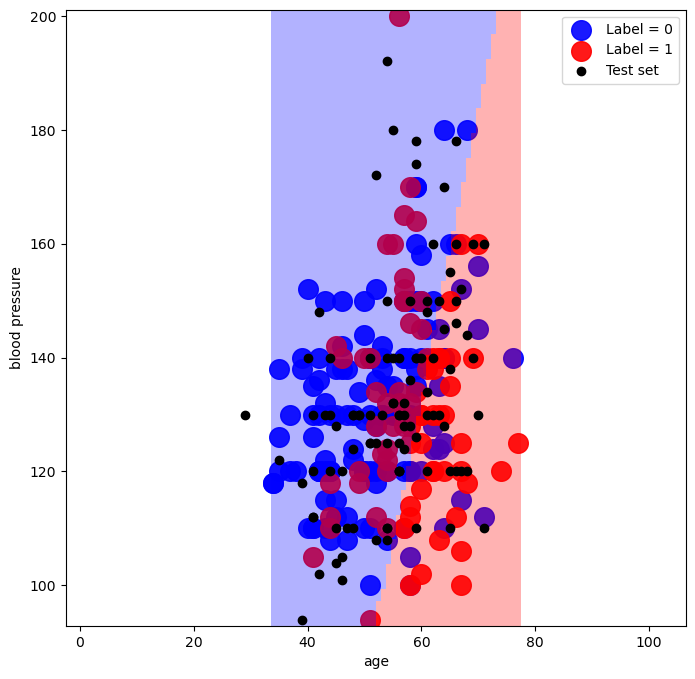

In [37]:
features_to_plot = ['age', 'blood pressure']
x_plot = x_train[features_to_plot]
x_test_plot = x_test[features_to_plot]

mlp_2f = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(7,3), random_state=0)
mlp_2f.fit(x_plot, labels_train)

plt.figure(figsize=(8,8))
plot_decision_surface(mlp_2f, x_plot.values, labels_train, colors=['b','r'])  # convert to NumPy array
plt.scatter(x_test_plot.iloc[:,0], x_test_plot.iloc[:,1], c='k', label='Test set')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.legend()
plt.show()

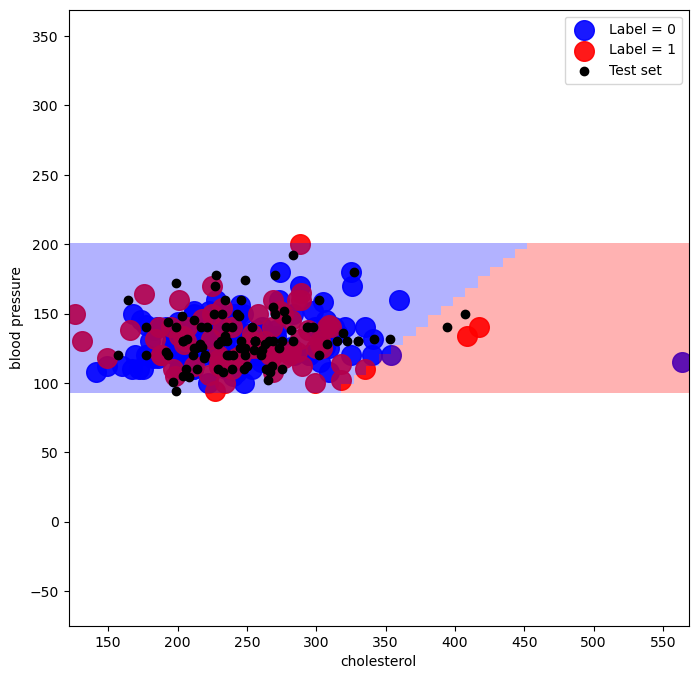

In [38]:
features_to_plot2 = ['cholesterol', 'blood pressure']
x_plot = x_train[features_to_plot2]
x_test_plot = x_test[features_to_plot2]

mlp_2f = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(7,3), random_state=0)
mlp_2f.fit(x_plot, labels_train)

plt.figure(figsize=(8,8))
plot_decision_surface(mlp_2f, x_plot.values, labels_train, colors=['b','r'])  # convert to NumPy array
plt.scatter(x_test_plot.iloc[:,0], x_test_plot.iloc[:,1], c='k', label='Test set')
plt.xlabel(features_to_plot2[0])
plt.ylabel(features_to_plot2[1])
plt.legend()
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


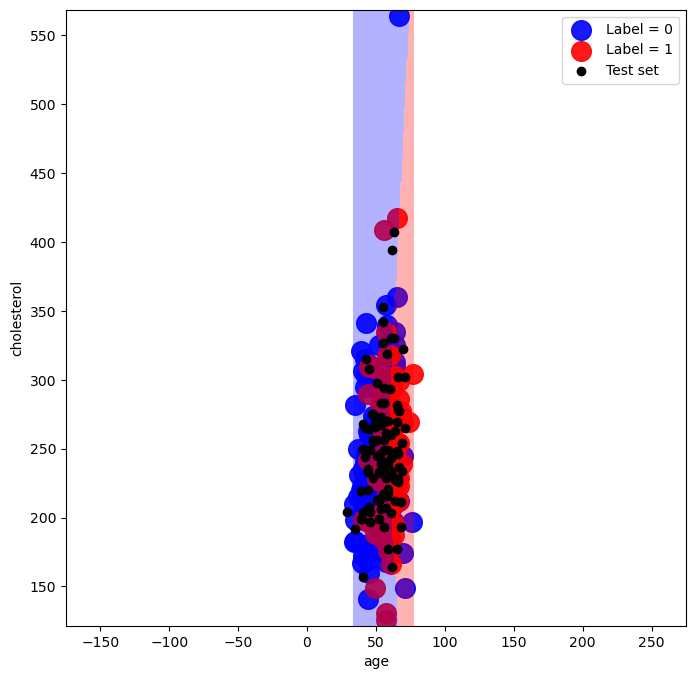

In [39]:
features_to_plot3 = ['age', 'cholesterol']
x_plot = x_train[features_to_plot3]
x_test_plot = x_test[features_to_plot3]

mlp_2f = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(7,3), random_state=0)
mlp_2f.fit(x_plot, labels_train)

plt.figure(figsize=(8,8))
plot_decision_surface(mlp_2f, x_plot.values, labels_train, colors=['b','r']) 
plt.scatter(x_test_plot.iloc[:,0], x_test_plot.iloc[:,1], c='k', label='Test set')
plt.xlabel(features_to_plot3[0])
plt.xlim(0, 100) 
plt.ylabel(features_to_plot3[1])
plt.legend()
plt.show()
warnings.filterwarnings('ignore')

2 results - 2 tables? box plot 
- using different numbers of groups for the "target label" and graphing CR
- using different parameters (alpha level) and showing CR 